In [62]:
import string
from os import listdir
from os.path import isfile, join

import nltk
from nltk import word_tokenize
from nltk.corpus import opinion_lexicon
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re


In [63]:
nltk.download('opinion_lexicon')
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/dylanedwards/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dylanedwards/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dylanedwards/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
punctuation = string.punctuation
positive_dict = set(opinion_lexicon.positive())
negative_dict = set(opinion_lexicon.negative())
positive_dict_stemmed = [PorterStemmer().stem(word) for word in positive_dict]
negative_dict_stemmed = [PorterStemmer().stem(word) for word in negative_dict]

contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

def get_files_from_dir(directory):
    return [f for f in listdir(directory) if isfile(join(directory, f))]

def process_string_sentence(text):
        englishStopwords = stopwords.words("english")  # non-neccesary words
        text = text.lower()  # case folding
        # remove punctuation
        text = "".join([char for char in text if char not in punctuation])
        words = word_tokenize(text)
        removed = [word for word in words if word not in englishStopwords]
        stemmed = [PorterStemmer().stem(word) for word in removed]
        stemmed_sentence = " ".join(stemmed)
        return stemmed_sentence

def process_string(text):
        englishStopwords = stopwords.words("english")  # non-neccesary words
        text = text.lower()  # case folding
        # remove punctuation
        text = "".join([char for char in text if char not in punctuation])
        words = word_tokenize(text)
        removed = [word for word in words if word not in englishStopwords]
        return [", ".join(removed)]


def tokenize_files(files, dir):
        cleaned_positive_files = []
        for file in files:
            file_path = str.format("{}/{}", dir, file)
            with open(file_path) as f:
                raw_text = f.read()
                cleaned_positive_files.append(process_string(raw_text))
        return cleaned_positive_files

def is_word_positive(word):
        if word in positive_dict or word in positive_dict_stemmed:
            return True
        return False

def is_word_negative(word):
    if word in negative_dict or word in negative_dict_stemmed:
        return True
    return False



def get_word_occurrences(tokenized_files):
        word_occurrences = {}
        word_occurrences["positive"] = 0
        word_occurrences["negative"] = 0
        total_num_words = 0
        for file in tokenized_files:
            # calc number exclams
            # calc number pos/neg/words
            for word in file:
                if is_word_positive(word):
                    word_occurrences["positive"] += 1
                if is_word_negative(word):
                    word_occurrences["negative"] += 1
                if word not in word_occurrences:
                    word_occurrences[word] = 0
                word_occurrences[word] += 1
                total_num_words += 1
        return word_occurrences, total_num_words

def get_raw_text_from_files(files: list, dir: str) -> list:
    raw_text = []
    for file in files:
        file_path = str.format("{}/{}", dir, file)
        with open(file_path) as f:
            file_text_in_lines = f.read()
            raw_text.append(file_text_in_lines)
    return raw_text

def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''

    # Convert words to lower case
    text = text.lower()

    # Replace contractions with their longer forms
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)

    return text


In [80]:
import numpy as np
import pandas as pd
neg_data = np.array(get_raw_text_from_files(get_files_from_dir("./data/neg"), "data/neg"))
pos_data = np.array(get_raw_text_from_files(get_files_from_dir("./data/pos"), "data/pos"))
allData = np.concatenate((neg_data, pos_data))
# making labels for the data, the first
neg_labels = np.fromiter([0 for i in range(len(neg_data))], int)  # create negative labels
pos_labels = np.fromiter([1 for i in range(len(pos_data))], int)  # create positive labels
allLabels = np.concatenate((neg_labels, pos_labels))

df = pd.DataFrame()
df['Text_Cleaned'] = list(map(clean_text, allData))
df['Text_Cleaned']


0       [ordered, hp4705, bluetooth, keyboard, sent, t...
1       [hoping, buy, small, handheld, vacuum, office,...
2       [bought, 3, vtech, phones, house, since, begin...
3       [canon, s2, batteries, last, almost, long, che...
4       [purchased, 10, drives, mistake, flakey, disap...
                              ...                        
1995    [received, pretty, quick, sdsdqu, 1024, e10m, ...
1996    [listed, product, description, pico, works, ip...
1997    [bought, folks, christmas, took, time, hook, m...
1998    [purchased, monster, cable, mp, hts, 1000, wit...
1999    [fabulous, product, store, 700, photos, 8, meg...
Name: Text_Cleaned, Length: 2000, dtype: object

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
# print(allData[0:2])
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
y = bow_converter.fit_transform(df['Text_Cleaned'])
# bigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[2,2])
# tfidf_transform = text.TfidfTransformer(norm=None)
# X_tfidf = tfidf_transform.fit_transform(X_bow)
bow_converter.vocabulary_

{'ordered': 7011,
 'hp4705': 4995,
 'bluetooth': 1519,
 'keyboard': 5634,
 'sent': 8838,
 'two': 10389,
 'non': 6784,
 'item': 5508,
 'send': 8820,
 'back': 1257,
 'hope': 4952,
 'get': 4498,
 'credit': 2628,
 'hoping': 4959,
 'buy': 1740,
 'small': 9153,
 'handheld': 4722,
 'vacuum': 10685,
 'office': 6922,
 'computer': 2322,
 'hardware': 4763,
 'keyboads': 5633,
 'air': 798,
 'inlets': 5292,
 'however': 4991,
 'datavac': 2774,
 'little': 5961,
 'power': 7584,
 'even': 3738,
 'full': 4372,
 'charge': 1993,
 'next': 6745,
 'useless': 10643,
 'cannot': 1825,
 'recommend': 8097,
 'bought': 1593,
 '3': 236,
 'vtech': 10850,
 'phones': 7365,
 'house': 4985,
 'since': 9049,
 'begining': 1381,
 'battery': 1329,
 'problems': 7699,
 'really': 8016,
 'annoying': 950,
 'make': 6144,
 'phone': 7361,
 'call': 1791,
 'work': 11157,
 'point': 7508,
 'time': 10096,
 'least': 5823,
 'one': 6957,
 'constantly': 2422,
 'reports': 8301,
 'low': 6056,
 'message': 6333,
 'means': 6272,
 'use': 10636,
 'cou

In [67]:
from sklearn.linear_model import LogisticRegression

def simple_logistic_classify(trainingData, trainingLabels, testingData, testingLabels, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(trainingData, trainingLabels)
    score = model.score(testingData, testingLabels)
    print('Test Score with', description, 'features', score)
    return model

/Users/dylanedwards/Desktop/oxy-nlp/hw2/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dylanedwards/Desktop/oxy-nlp/hw2/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/dylanedwards/Desktop/oxy-nlp/hw

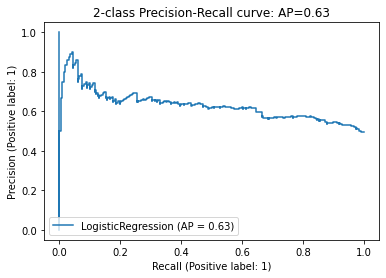

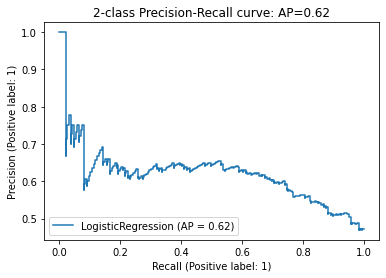

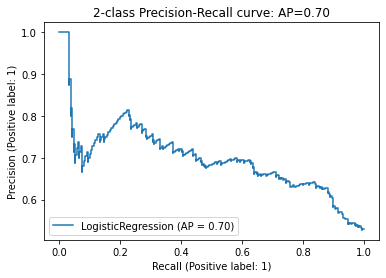

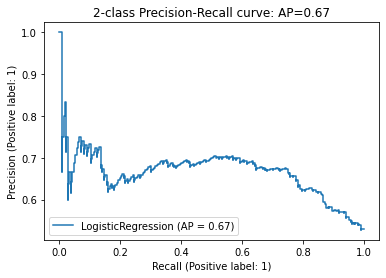

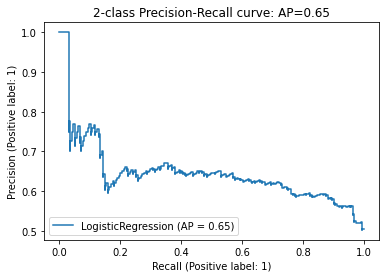

In [99]:

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5, shuffle=True)
#Unsupervised smooth-inverse frequency (uSIF) weighted sentence embeddings model.

max_iter = 200000

for trainingIndex, testingIndex in kf.split(allData):
    trainingData, testingData = allData[trainingIndex], allData[testingIndex]
    trainingLabels, testingLabels = allLabels[trainingIndex], allLabels[testingIndex]

    # train naive bayes model
    # gnb = GaussianNB()
    # gnb.fit(train_embed, trainingLabels)
    bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
    trainingData = bow_converter.fit_transform(trainingData)
    testingData = bow_converter.transform(testingData)
#     print("hi")
#     print(trainingData.size)
#     print(testingData.size)
#     print(testingLabels.size)
    model = LogisticRegression(C=1.0, max_iter=1000).fit(trainingData, trainingLabels)

    score = model.score(testingData, testingLabels)
#     print(score)
    #
    labelPrediction = model.predict_proba(testingData)[:, 1]
#     print("label pred", labelPrediction)

    precision, recall, thresholds = precision_recall_curve(testingLabels, labelPrediction)
    average_precision = average_precision_score(testingLabels, labelPrediction)

    disp = plot_precision_recall_curve(model, testingData, testingLabels)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AP={0:0.2f}'.format(average_precision))

